# Software Engineering Project
#### Submitted to Dr. Sudhakar Kumar
#### By: Sahil Garg (CO22358), Samar Pratap Singh (CO22361), Shaurya Katna (CO22362), Ayushi (MCO22384), Vanshika Chilkoti (MCO22392)

In this project, we predict the Sleep Quality of the person rated from 0 - 10. Two types of ML models are being used: Linear Discriminent Analysis and Decision Trees.

## Dataset

The dataset being used is sourced from kaggle. The dataset can be found at: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset. The various attributes of the dataset are as follows:

1. Person ID: An identifier for each individual.
2. Gender: The gender of the person (Male/Female).
3. Age: The age of the person in years.
4. Occupation: The occupation or profession of the person.
5. Sleep Duration (hours): The number of hours the person sleeps per day.
6. Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
7. Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
8. Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
9. BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
10. Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
11. Heart Rate (bpm): The resting heart rate of the person in beats per minute.
12. Daily Steps: The number of steps the person takes per day.
13. Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

## Results
LDA gives a maximum of 98.67% accuracy and Decision Trees gives a maximum of 100% accuracy for the current dataset.

The effect of each attribute on the result of the model in each case is shown in the graphs.

# Linear Discriminent Analysis

In [58]:
# using Linear Discriminent Analysis

import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import os

# Get the data
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        datasetPath = os.path.join(dirname, filename)

data = pd.read_csv(datasetPath)

# Label encode the data
label_encoder = LabelEncoder()

for column in ['Gender', 'BMI Category', 'Sleep Disorder']:
    data[column] = label_encoder.fit_transform(data[column])

# Refining the data
data[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = data['Blood Pressure'].str.split("/", expand=True)

# Convert columns to numeric
data['Systolic Blood Pressure'] = pd.to_numeric(data['Systolic Blood Pressure'])
data['Diastolic Blood Pressure'] = pd.to_numeric(data['Diastolic Blood Pressure'])

# Define features and target variable
X = data.drop(columns=['Person ID', 'Occupation', 'Blood Pressure', 'Quality of Sleep'])
y = data['Quality of Sleep']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model on the training data
lda.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = lda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9866666666666667


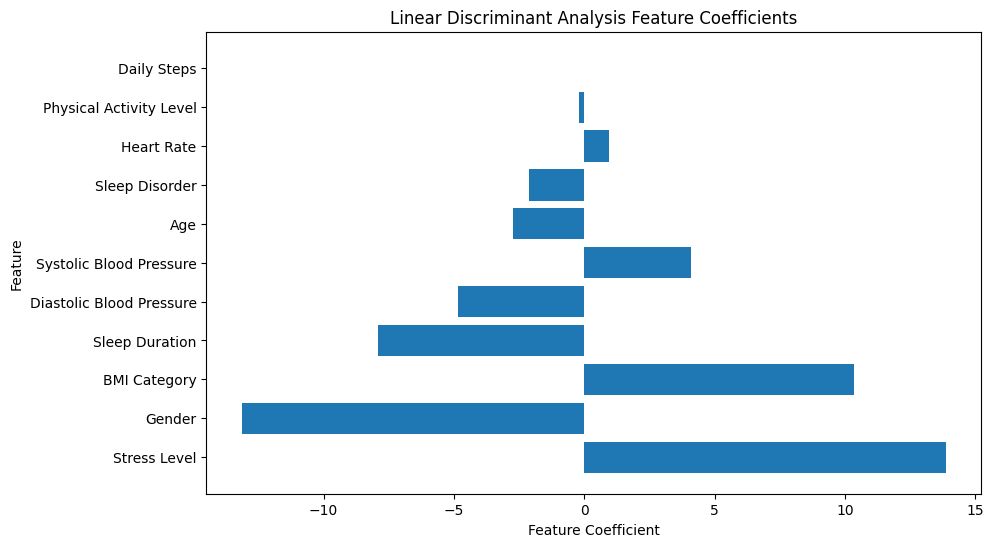

In [59]:
import matplotlib.pyplot as plt

# Extract feature coefficients from the LDA model
feature_coefficients = lda.coef_[0]
sorted_indices = np.argsort(np.abs(feature_coefficients))[::-1]
sorted_features = X.columns[sorted_indices]
sorted_coefficients = feature_coefficients[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_coefficients)), sorted_coefficients, align='center')
plt.yticks(range(len(sorted_coefficients)), sorted_features)
plt.xlabel('Feature Coefficient')
plt.ylabel('Feature')
plt.title('Linear Discriminant Analysis Feature Coefficients')
plt.show()

# Decision Trees

In [60]:
# Using Decision Trees

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import os

# Get the data
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        datasetPath = os.path.join(dirname, filename)

data = pd.read_csv(datasetPath)

# Label encode the data
label_encoder = LabelEncoder()

for column in ['Gender', 'BMI Category', 'Sleep Disorder']:
    data[column] = label_encoder.fit_transform(data[column])

# Refining the data
data[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = data['Blood Pressure'].str.split("/", expand=True)

# Convert columns to numeric
data['Systolic Blood Pressure'] = pd.to_numeric(data['Systolic Blood Pressure'])
data['Diastolic Blood Pressure'] = pd.to_numeric(data['Diastolic Blood Pressure'])

# Define features and target variable
X = data.drop(columns=['Person ID', 'Occupation', 'Blood Pressure', 'Quality of Sleep'])
y = data['Quality of Sleep']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


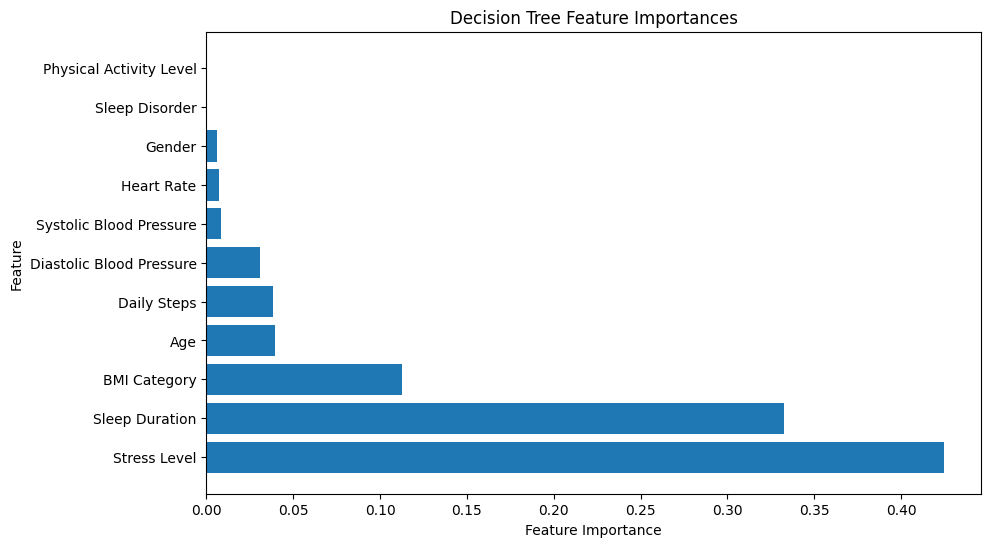

In [61]:
import matplotlib.pyplot as plt

# Visualize feature importances
feature_importances = decision_tree.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importances')
plt.show()

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pickle
import os

# Get the data
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        datasetPath = os.path.join(dirname, filename)

data = pd.read_csv(datasetPath)

# Label encode the data
label_encoder = LabelEncoder()

for column in ['Gender', 'BMI Category', 'Sleep Disorder']:
    data[column] = label_encoder.fit_transform(data[column])

# Refining the data
data[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = data['Blood Pressure'].str.split("/", expand=True)

# Convert columns to numeric
data['Systolic Blood Pressure'] = pd.to_numeric(data['Systolic Blood Pressure'])
data['Diastolic Blood Pressure'] = pd.to_numeric(data['Diastolic Blood Pressure'])

# Define features and target variable
X = data.drop(columns=['Person ID', 'Occupation', 'Blood Pressure', 'Quality of Sleep'])
y = data['Quality of Sleep']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train your Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Save the trained model to a file
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(decision_tree, file)